# 8行代码完成回归模型

- 调用线性回归函数
    ##### from sklearn.linear_model import Linear Regression

- 导入数据集（这里将全部数据用于训练，并没有对数据进行划分，上例中将数据划分为训练和测试数据，后面会讲到交叉验证）
    ##### loaded_data = datasets.load_boston()
    ##### data_X = loaded_data.data
    ##### data_y = loaded_data.target

- 设置线型回归模块
    ##### model = LinearRegression()

- 训练数据，得出参数
    ##### model.fit(data_X, data_y)
- 利用模型，对比数据，进行预测，与原标签对比
    ##### print(model.predict(data_X[:4,:]))
    ##### print(data_y[:4])

案例：store

# 1 导入数据和模块

In [2]:
#导入模块和数据
#index_col = 0 去除Python默认第一列序号
#info()查看哪些列是空值
import pandas as pd
store = pd.read_csv('store.csv', index_col = 0)
store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 985 entries, 845 to 26
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   revenue   985 non-null    float64
 1   reach     985 non-null    int64  
 2   local_tv  929 non-null    float64
 3   online    985 non-null    int64  
 4   instore   985 non-null    int64  
 5   person    985 non-null    int64  
 6   event     985 non-null    object 
dtypes: float64(2), int64(4), object(1)
memory usage: 61.6+ KB


In [3]:
#发现总共Int64Index: 985 entries, 其他列都是985 entries，但local_tv 929显然有56个空值
#另一种检查空值的做法
store.isnull().sum()

revenue      0
reach        0
local_tv    56
online       0
instore      0
person       0
event        0
dtype: int64

In [4]:
#describe了解数据分布，大小情况
#在describe时也要确认数据与真实情况是否一致
store.describe()

,revenue,reach,local_tv,online,instore,person
count,985.000000,985.000000,929.000000,985.000000,985.000000,985.000000
mean,38357.355025,3.395939,31324.061109,1596.527919,3350.962437,11.053807
std,11675.603883,1.011913,3970.934733,496.131586,976.546381,3.041740
min,5000.000000,0.000000,20000.000000,0.000000,0.000000,0.000000
25%,30223.600000,3.000000,28733.830000,1253.000000,2690.000000,9.000000
50%,38159.110000,3.000000,31104.520000,1607.000000,3351.000000,11.000000
75%,45826.520000,4.000000,33972.410000,1921.000000,4011.000000,13.000000
max,79342.070000,7.000000,43676.900000,3280.000000,6489.000000,24.000000


# 2 单变量分析 - event分析与转置

回归、预测等，数据颗粒度越细，数据越全对准确预测越有帮助

In [12]:
#查看event的具体值
#看到event的数据类型为object
store.event.unique()

array(['non_event', 'special', 'cobranding', 'holiday'], dtype=object)

In [15]:
#查看不同event对应的revenue的情况
store.groupby(store['event'])['revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
event,,,,,,,,
cobranding,398.0,38277.664497,11879.097324,7146.99,30472.1525,37864.155,46333.5600,79342.07
holiday,103.0,37791.890583,11942.369136,5000.00,29644.5250,38432.780,46036.1300,73377.15
non_event,192.0,37903.081562,11186.436740,6874.43,29852.3775,37937.175,44611.6375,69429.39
special,292.0,38964.136438,11648.616882,10207.96,30325.8125,39197.870,45897.0400,71757.50


In [17]:
#查看不同event对应的local_tv的情况
store.groupby(store['event'])['local_tv'].describe()

,count,mean,std,min,25%,50%,75%,max
event,,,,,,,,
cobranding,376.0,31424.590186,3951.049566,21252.35,28746.9725,31336.570,33839.0200,42162.64
holiday,96.0,30860.524896,4448.719364,21792.84,27769.6000,30564.705,33595.5975,41047.01
non_event,182.0,31415.197527,3952.155383,20000.00,29222.5875,31238.235,34386.0825,42069.84
special,275.0,31288.110982,3842.412128,21428.20,28668.7100,30921.790,34105.6250,43676.90


In [21]:
#将类别变量event转换为哑变量dummies（即将其变成数字型变量0/1）
#get_dummies(dataframe) 是利用pandas实现one hot encode的方式
store = pd.get_dummies(store)

In [22]:
#确认类别变量已转换为数字变量(event的数据类型都变成了uint8))
store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 985 entries, 845 to 26
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   revenue           985 non-null    float64
 1   reach             985 non-null    int64  
 2   local_tv          929 non-null    float64
 3   online            985 non-null    int64  
 4   instore           985 non-null    int64  
 5   person            985 non-null    int64  
 6   event_cobranding  985 non-null    uint8  
 7   event_holiday     985 non-null    uint8  
 8   event_non_event   985 non-null    uint8  
 9   event_special     985 non-null    uint8  
dtypes: float64(2), int64(4), uint8(4)
memory usage: 97.7 KB


In [23]:
#查看event新生成的4个标签，每个标签取值0/1
store.head()

,revenue,reach,local_tv,online,instore,person,event_cobranding,event_holiday,event_non_event,event_special
845,45860.28,2,31694.91,2115,3296,8,0,0,1,0
483,63588.23,2,35040.17,1826,2501,14,0,0,0,1
513,23272.69,4,30992.82,1851,2524,6,0,0,0,1
599,45911.23,2,29417.78,2437,3049,12,0,0,0,1
120,36644.23,2,35611.11,1122,1142,13,1,0,0,0


# 3 多变量分析 - 类别相关性

In [26]:
#对整个store里的数据进行相关性分析
store.corr()

,revenue,reach,local_tv,online,instore,person,event_cobranding,event_holiday,event_non_event,event_special
revenue,1.000000,-0.155314,0.602114,0.171227,0.311739,0.559208,-0.005623,-0.016559,-0.019155,0.033752
reach,-0.155314,1.000000,-0.034039,-0.025141,0.035635,0.061417,0.043809,0.020398,-0.043128,-0.023330
local_tv,0.602114,-0.034039,1.000000,0.006775,-0.046825,0.048664,0.020886,-0.039650,0.011335,-0.005874
online,0.171227,-0.025141,0.006775,1.000000,-0.026399,0.036662,-0.024646,-0.018596,-0.020587,0.056799
instore,0.311739,0.035635,-0.046825,-0.026399,1.000000,-0.007482,-0.057725,0.045963,0.015495,0.017788
person,0.559208,0.061417,0.048664,0.036662,-0.007482,1.000000,0.002439,-0.025692,-0.025568,0.036771
event_cobranding,-0.005623,0.043809,0.020886,-0.024646,-0.057725,0.002439,1.000000,-0.281389,-0.405169,-0.534499
event_holiday,-0.016559,0.020398,-0.039650,-0.018596,0.045963,-0.025692,-0.281389,1.000000,-0.168151,-0.221824
event_non_event,-0.019155,-0.043128,0.011335,-0.020587,0.015495,-0.025568,-0.405169,-0.168151,1.000000,-0.319403
event_special,0.033752,-0.023330,-0.005874,0.056799,0.017788,0.036771,-0.534499,-0.221824,-0.319403,1.000000


In [31]:
#store.corr()[核心变量] 重点分析与revenue相关变量的相关性
#sort_values() 将变量按照与revenue的相关系数的大小排序
store.corr()[['revenue']].sort_values(['revenue'], ascending = False)

,revenue
revenue,1.000000
local_tv,0.602114
person,0.559208
instore,0.311739
online,0.171227
event_special,0.033752
event_cobranding,-0.005623
event_holiday,-0.016559
event_non_event,-0.019155
reach,-0.155314


In [ ]:
#发现local_tv, person, instore都与revenue有强正相关关系
#event_corbranding, event_holiday, event_non_event和revenue的相关性较弱，不要过度解读

# 4 业务回归模型

## 4.1 建模

In [3]:
#导入模块
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
%matplotlib inline

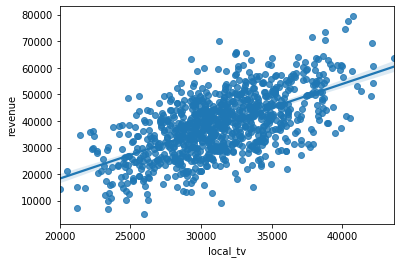

In [37]:
#regplot() 线性关系可视化，并简化方法调用里的x = , y = , data = 
#斜率与相关系数有关
#revenue与local_tv的相关关系
sns.regplot('local_tv', 'revenue', store)

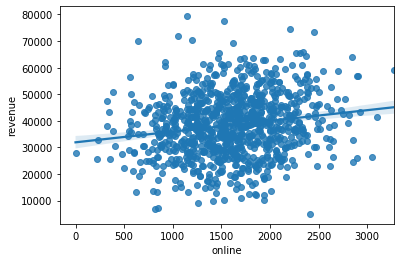

In [38]:
#revenue与online的相关关系
sns.regplot('online', 'revenue', store)

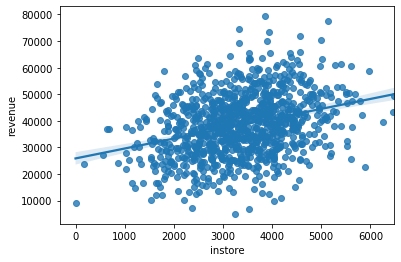

In [39]:
#revenue与instore的关系
sns.regplot('instore', 'revenue', store)

In [6]:
#查看3个变量与revenue的相关关系
#建立一个空的线性回归模型
model = LinearRegression()

#设定自变量和因变量,一定要注意分清变量，如因变量只有一个
y = store['revenue']
x = store[['local_tv', 'online', 'instore']]

#拟合
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## 4.2 缺失值处理

拟合后发现有缺失值NaN
缺失值出现时，首先看比例，根据比例的不同情况来进行处理
- 缺失值较少，如本案例中为5%左右，缺失不严重，可以直接进行填充
- 缺失值较多，如80% - 90%左右，可以删除，但最好进行填充

几种填充方式：
- 填充0
- 均值填充
- 中位数填充
- 数据模型填充 - local_tv和其他变量的线性模型填充

In [8]:
#考虑用0填充（但local_tv最小值都是20000，这里用0填充只是举个例子）
#fillna() 括号里是用于填充的值
#store = store.fillna(0)
#考虑用local_tv的均值填充较为合理
store = store.fillna(store['local_tv'].mean())

In [113]:
#一定要先调用fit()才能看系数
#查看自变量系数coef_（分别对应之前设置的local_tv, person, online）
model.coef_

array([0.41881781, 4.26734438, 3.55848281])

In [114]:
#模型的截距intercept_，即当所有变量为0时的取值
model.intercept_

7246.859758160223

## 4.3 模型的评估和迭代优化

### 4.3.1 模型评估

步骤：
 - xy打分
 - 通过x计算y的预测值
 - 计算error误差
 - 公式

In [115]:
#模型的评估，x为local_tv, online, instore
score = model.score(x, y) #x和y打分
predictions = model.predict(x) #计算y的预测值
error = predictions-y #计算误差

rmse = (error**2).mean()**.5 #计算rmse 均方根误差
mae = abs(error).mean() #计算mae 平均绝对误差

print(rmse)
print(mae)

10333.097222337929
8243.988551200348


### 4.3.2 模型的迭代优化

在迭代优化过程中需要注意：
- 需要根据统计指标评估x变量对y变量的解释度
- 从业务角度来看，新增x变量之后，之前的变量对目标的贡献度系数发生了什么变化

In [116]:
#设定新的自变量，增加person
y = store['revenue']
x = store[['local_tv', 'online', 'instore', 'person']]

#拟合
model.fit(x,y)

#查看coef_
model.coef_

array([4.01736340e-01, 3.79371728e+00, 3.61050584e+00, 2.10959413e+03])

In [117]:
#查看intercept_
model.intercept_

-14985.713959029374

In [118]:
#模型评估
score = model.score(x,y)
predictions = model.predict(x)
error = predictions-y

rmse = (error**2).mean()**.5
mae = abs(error).mean()

print(rmse)
print(mae)

8106.512169325365
6402.202883441893


与未增加变量person之前相比，预测销售额降低了

### 4.3.3 statsmodel数据库，ols工具

In [127]:
#如果希望看到标准的模型输出表
from statsmodels.formula.api import ols

x = store[['local_tv','person','instore']]
y = store['revenue']

#用ols的方法拟合之前设定的x, y与store的数据，生成一个model
model = ols('y~x', store).fit()

#观察coef_, P值显著性
print(model.summary())

OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     316.1
Date:                Fri, 25 Sep 2020   Prob (F-statistic):          1.50e-143
Time:                        15:37:51   Log-Likelihood:                -10289.
No. Observations:                 985   AIC:                         2.059e+04
Df Residuals:                     981   BIC:                         2.061e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -8967.7369   1618.703     -5.540      0.000   -1.21e+04   -5791.218
x

从模型角度来看，其他数控制在统一的水平下时：
- 以local_tv, person, instore为例，公式为：销售额 = -8968X + 0.4*local_tv + 2132*person + 3.56*instore
- 每提升1元local_tv(x[0])投入，可以带来0.4元的销售额回报；每提升1元person(x[1])投入，可以带来2132元的销售额回报
- 不断收集数据和添加新变量，能提升对整体营销资源投入的把握

优化后的模型：

In [11]:
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
model = LinearRegression()

y = store['revenue']
x = store[['local_tv', 'online', 'instore', 'person']]

model.fit(x,y)

score = model.score(x,y)
predictions = model.predict(x)
error = predictions-y

rmse = (error**2).mean()**.5
mae = abs(error).mean()

print(rmse)
print(mae)

5591.764749669002
4485.50638311087


In [14]:
x = store[['local_tv', 'online', 'instore', 'person']]
y = store['revenue']

#用ols的方法拟合之前设定的x, y与store的数据，生成一个model
model = ols('y~x', store).fit()

#观察coef_, P值显著性
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     822.1
Date:                Sat, 26 Sep 2020   Prob (F-statistic):          2.87e-311
Time:                        09:24:24   Log-Likelihood:                -9897.3
No. Observations:                 985   AIC:                         1.980e+04
Df Residuals:                     980   BIC:                         1.983e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.865e+04   1805.566    -32.483      0.0

从模型角度来看，其他数控制在统一的水平下时：
- rmse和mae均有所下降
- 以local_tv, online, instore, person为例，公式为：销售额 = -5.865e+04X + 1.7498*local_tv + 3.698*online + 4.1391*instore+2028.6868*person
- 每提升1元local_tv(x[0])投入，可以带来1.74元的销售额回报；每提升1元person(x[1])投入，可以带来2028元的销售额回报
- 不断收集数据和添加新变量，能提升对整体营销资源投入的把握